<a href="https://colab.research.google.com/github/hiro106/signate_bento_sales_prediction/blob/main/bento_demand_prediction_signate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [344]:
# From the middle of this notebook, I checked behaviors of pyplot, 
# executing the methods in various conditions and combinations.

In [345]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [346]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [347]:
import pandas as pd

In [348]:
# pd

In [349]:
import numpy as np

In [350]:
np

<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'>

In [351]:
from matplotlib import pyplot as plt

In [352]:
# plt

In [353]:
import seaborn as sns

In [354]:
# sns

In [355]:
sns.set(font="IPAexGothic", style="white")

In [356]:
train = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/train.csv")
pd.set_option('max_rows', 20)
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [357]:
# train.info()

In [358]:
test = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/test.csv")

In [359]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       40 non-null     object 
 1   week           40 non-null     object 
 2   soldout        40 non-null     int64  
 3   name           40 non-null     object 
 4   kcal           36 non-null     float64
 5   remarks        7 non-null      object 
 6   event          3 non-null      object 
 7   payday         2 non-null      float64
 8   weather        40 non-null     object 
 9   precipitation  40 non-null     object 
 10  temperature    40 non-null     float64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ KB


In [360]:
sample = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/sample.csv", header=None)

In [361]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       40 non-null     object
 1   1       40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [362]:
# sample

In [363]:
print("Data Shapes")
print("Train:", train.shape, "Test:", test.shape, "Sample:", sample.shape)

Data Shapes
Train: (207, 12) Test: (40, 11) Sample: (40, 2)


In [364]:
train.index = pd.to_datetime(train["datetime"])
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [365]:
# pandas.to_datetime

# Convert argument to datetime.

# This function converts a scalar, array-like, Series or DataFrame/dict-like 
# to a pandas datetime object.

In [366]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [367]:
# type(train)

In [368]:
train_name = train["name"]
train_name

datetime
2013-11-18            厚切りイカフライ
2013-11-19             手作りヒレカツ
2013-11-20          白身魚唐揚げ野菜あん
2013-11-21              若鶏ピリ辛焼
2013-11-22            ビッグメンチカツ
2013-11-25                鶏の唐揚
2013-11-26            豚のスタミナ炒め
2013-11-27            ボローニャ風カツ
2013-11-28               ハンバーグ
2013-11-29       タルタルinソーセージカツ
2013-12-02               マーボ豆腐
2013-12-03            厚揚げ豚生姜炒め
2013-12-04        クリームチーズ入りメンチ
2013-12-05         鶏のカッシュナッツ炒め
2013-12-06            手作りロースカツ
2013-12-09          ハンバーグデミソース
2013-12-10       やわらかロースのサムジョン
2013-12-11                五目御飯
2013-12-12                肉じゃが
2013-12-13            タンドリーチキン
2013-12-16           カキフライタルタル
2013-12-17             手作りヒレカツ
2013-12-18                 回鍋肉
2013-12-19             ポーク味噌焼き
2013-12-20           鶏の唐揚げ甘酢あん
2013-12-24           さっくりメンチカツ
2013-12-25           手ごね風ハンバーグ
2013-12-26                  酢豚
2014-01-07        カレー入りソーセージカツ
2014-01-08              豚肉の生姜焼
2014-01-09              鶏チリソース
2014-01-10            手作りロースカツ

In [369]:
type(train_name)

pandas.core.series.Series

In [370]:
len(train_name)

207

In [371]:
train_name_set = set(train_name)
train_name_set

{'いか天ぷら',
 'かじきの甘辛煮',
 'きのこソースハンバーグ',
 'さっくりメンチカツ',
 'さわら焼味噌掛け',
 'さんま辛味焼',
 'たっぷりベーコンフライ',
 'ひやしたぬきうどん・炊き込みご飯',
 'ぶりレモンペッパー焼き',
 'ますのマスタードソース',
 'やわらかロースのサムジョン',
 'アジ唐揚げ南蛮ソース',
 'エビフライ',
 'カキフライタルタル',
 'カレイの唐揚げ',
 'カレイ唐揚げ 甘酢あん',
 'カレイ唐揚げ夏野菜あん',
 'カレイ唐揚げ野菜あんかけ',
 'カレイ唐揚げ野菜餡かけ',
 'カレイ野菜あんかけ',
 'カレー入りソーセージカツ',
 'キスと野菜の天ぷら',
 'キーマカレー',
 'クリームチーズ入りメンチ',
 'ゴーヤチャンプルー',
 'サバ焼味噌掛け',
 'サーモンのムニエル2色ソース',
 'サーモンフライ・タルタル',
 'ジャンボチキンカツ',
 'ジューシーメンチカツ',
 'タルタルinソーセージカツ',
 'タンドリーチキン',
 'チキンのコーンクリーム焼き',
 'チキンの辛味噌焼き',
 'チキンカレー',
 'チキンクリームシチュー',
 'チキンステーキ・きのこソース',
 'チキンフリカッセ',
 'チキン南蛮',
 'チキン香草焼きマスタードソース',
 'チャプチェ',
 'チンジャオロース',
 'チーズハンバーグ',
 'チーズメンチカツ',
 'チーズ入りハンバーグ',
 'チーズ入りメンチカツ',
 'ハンバーグ',
 'ハンバーグカレーソース',
 'ハンバーグケッチャップソース',
 'ハンバーグデミソース',
 'ハンバーグ和風きのこソース',
 'ハンバーグ（デミきのこバター）',
 'バーベキューチキン',
 'ビッグメンチカツ',
 'ビーフカレー',
 'ビーフシチュー',
 'ビーフストロガノフ',
 'ビーフトマト煮',
 'プルコギ',
 'ホタテクリ―ムシチュー',
 'ボローニャ風カツ',
 'ポークカレー',
 'ポークソテー韓国ソース',
 'ポークハヤシ',
 'ポーク味噌焼き',
 'ポーク生姜焼き',
 'マーボ茄子',
 'マーボ豆腐',
 'メダイ照り焼',
 'メンチカツ',
 'ランチビュッフェ'

In [372]:
len(train_name_set)

156

In [373]:
print(type(train))
print(train.loc[train['payday'] == 1.0])

<class 'pandas.core.frame.DataFrame'>
              datetime    y week  soldout           name   kcal   remarks  \
datetime                                                                    
2013-12-10  2013-12-10  155    火        0  やわらかロースのサムジョン    NaN       NaN   
2014-01-10   2014-1-10   87    金        0       手作りロースカツ  440.0       NaN   
2014-02-10   2014-2-10  137    月        0    鶏の唐揚げおろしソース  423.0       NaN   
2014-03-10   2014-3-10  123    月        0   海老クリーミ―クノーデル  385.0       NaN   
2014-04-10   2014-4-10   87    木        0    鶏の唐揚げおろしソース  362.0       NaN   
2014-05-09    2014-5-9   58    金        1       手作りチキンカツ  434.0       NaN   
2014-06-10   2014-6-10   56    火        0    カレイ唐揚げ野菜餡かけ  426.0       NaN   
2014-07-10   2014-7-10   48    木        0           プルコギ  386.0       NaN   
2014-08-08    2014-8-8  129    金        0         チキンカレー    NaN  お楽しみメニュー   
2014-09-10   2014-9-10   54    水        0    ぶりレモンペッパー焼き  450.0       NaN   

           event  payday weather prec

In [374]:
train.describe(include="O")

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,水,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [375]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [376]:
train.describe(include="all")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
count,207,207.000000,207,207.000000,207,166.000000,21,14,10.0,207,207,207.000000
unique,207,NaN,5,NaN,156,NaN,6,2,NaN,7,8,NaN
top,2013-11-18,NaN,水,NaN,メンチカツ,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,NaN
freq,1,NaN,43,NaN,6,NaN,12,9,NaN,53,169,NaN
mean,NaN,86.623188,NaN,0.449275,NaN,404.409639,NaN,NaN,1.0,NaN,NaN,19.252174
std,NaN,32.882448,NaN,0.498626,NaN,29.884641,NaN,NaN,0.0,NaN,NaN,8.611365
min,NaN,29.000000,NaN,0.000000,NaN,315.000000,NaN,NaN,1.0,NaN,NaN,1.200000
25%,NaN,57.000000,NaN,0.000000,NaN,386.000000,NaN,NaN,1.0,NaN,NaN,11.550000
50%,NaN,78.000000,NaN,0.000000,NaN,408.500000,NaN,NaN,1.0,NaN,NaN,19.800000
75%,NaN,113.000000,NaN,1.000000,NaN,426.000000,NaN,NaN,1.0,NaN,NaN,26.100000


In [377]:
# train["payday"]

In [378]:
train["payday"] = train["payday"].fillna(0)

In [379]:
# train["payday"]

In [380]:
# train["precipitation"]

In [381]:
train["precipitation"] = train["precipitation"].apply(lambda x: -1 if x == "--" else float(x))

In [382]:
train["precipitation"]

datetime
2013-11-18   -1.0
2013-11-19   -1.0
2013-11-20   -1.0
2013-11-21   -1.0
2013-11-22   -1.0
2013-11-25   -1.0
2013-11-26   -1.0
2013-11-27   -1.0
2013-11-28   -1.0
2013-11-29   -1.0
2013-12-02   -1.0
2013-12-03   -1.0
2013-12-04   -1.0
2013-12-05   -1.0
2013-12-06   -1.0
2013-12-09   -1.0
2013-12-10    0.5
2013-12-11   -1.0
2013-12-12   -1.0
2013-12-13   -1.0
2013-12-16   -1.0
2013-12-17   -1.0
2013-12-18   -1.0
2013-12-19    0.5
2013-12-20   -1.0
2013-12-24   -1.0
2013-12-25   -1.0
2013-12-26   -1.0
2014-01-07   -1.0
2014-01-08   -1.0
2014-01-09   -1.0
2014-01-10   -1.0
2014-01-14   -1.0
2014-01-15   -1.0
2014-01-16   -1.0
2014-01-17   -1.0
2014-01-20   -1.0
2014-01-21   -1.0
2014-01-22   -1.0
2014-01-23   -1.0
2014-01-24   -1.0
2014-01-27   -1.0
2014-01-28   -1.0
2014-01-29   -1.0
2014-01-30   -1.0
2014-01-31   -1.0
2014-02-03   -1.0
2014-02-04    0.0
2014-02-05   -1.0
2014-02-06   -1.0
2014-02-07   -1.0
2014-02-10   -1.0
2014-02-12   -1.0
2014-02-13   -1.0
2014-02-14    0.5
2

In [383]:
train["event"]

datetime
2013-11-18              NaN
2013-11-19              NaN
2013-11-20              NaN
2013-11-21              NaN
2013-11-22              NaN
2013-11-25              NaN
2013-11-26              NaN
2013-11-27              NaN
2013-11-28              NaN
2013-11-29              NaN
2013-12-02              NaN
2013-12-03              NaN
2013-12-04              NaN
2013-12-05              NaN
2013-12-06              NaN
2013-12-09              NaN
2013-12-10              NaN
2013-12-11              NaN
2013-12-12              NaN
2013-12-13              NaN
2013-12-16              NaN
2013-12-17             ママの会
2013-12-18              NaN
2013-12-19              NaN
2013-12-20              NaN
2013-12-24              NaN
2013-12-25              NaN
2013-12-26              NaN
2014-01-07              NaN
2014-01-08              NaN
2014-01-09              NaN
2014-01-10              NaN
2014-01-14              NaN
2014-01-15              NaN
2014-01-16              NaN
2014-01-17 

In [384]:
train["event"] = train["event"].fillna("なし")

In [385]:
# train["event"]

In [386]:
train["remarks"]

datetime
2013-11-18                         NaN
2013-11-19                         NaN
2013-11-20                         NaN
2013-11-21                         NaN
2013-11-22                         NaN
2013-11-25                         NaN
2013-11-26                         NaN
2013-11-27                         NaN
2013-11-28                         NaN
2013-11-29                         NaN
2013-12-02                         NaN
2013-12-03                         NaN
2013-12-04                         NaN
2013-12-05                         NaN
2013-12-06                         NaN
2013-12-09                         NaN
2013-12-10                         NaN
2013-12-11                         NaN
2013-12-12                         NaN
2013-12-13                         NaN
2013-12-16                         NaN
2013-12-17                         NaN
2013-12-18                         NaN
2013-12-19                         NaN
2013-12-20                         NaN
2013-12-24      

In [387]:
train["remarks"] = train["remarks"].fillna("なし")

In [388]:
# train["remarks"]

In [389]:
train["datetime"] 

datetime
2013-11-18    2013-11-18
2013-11-19    2013-11-19
2013-11-20    2013-11-20
2013-11-21    2013-11-21
2013-11-22    2013-11-22
2013-11-25    2013-11-25
2013-11-26    2013-11-26
2013-11-27    2013-11-27
2013-11-28    2013-11-28
2013-11-29    2013-11-29
2013-12-02     2013-12-2
2013-12-03     2013-12-3
2013-12-04     2013-12-4
2013-12-05     2013-12-5
2013-12-06     2013-12-6
2013-12-09     2013-12-9
2013-12-10    2013-12-10
2013-12-11    2013-12-11
2013-12-12    2013-12-12
2013-12-13    2013-12-13
2013-12-16    2013-12-16
2013-12-17    2013-12-17
2013-12-18    2013-12-18
2013-12-19    2013-12-19
2013-12-20    2013-12-20
2013-12-24    2013-12-24
2013-12-25    2013-12-25
2013-12-26    2013-12-26
2014-01-07      2014-1-7
2014-01-08      2014-1-8
2014-01-09      2014-1-9
2014-01-10     2014-1-10
2014-01-14     2014-1-14
2014-01-15     2014-1-15
2014-01-16     2014-1-16
2014-01-17     2014-1-17
2014-01-20     2014-1-20
2014-01-21     2014-1-21
2014-01-22     2014-1-22
2014-01-23     2

In [390]:
train["month"] = train["datetime"].apply(lambda x : int(x.split("-")[1]))

In [391]:
train["month"]

datetime
2013-11-18    11
2013-11-19    11
2013-11-20    11
2013-11-21    11
2013-11-22    11
2013-11-25    11
2013-11-26    11
2013-11-27    11
2013-11-28    11
2013-11-29    11
2013-12-02    12
2013-12-03    12
2013-12-04    12
2013-12-05    12
2013-12-06    12
2013-12-09    12
2013-12-10    12
2013-12-11    12
2013-12-12    12
2013-12-13    12
2013-12-16    12
2013-12-17    12
2013-12-18    12
2013-12-19    12
2013-12-20    12
2013-12-24    12
2013-12-25    12
2013-12-26    12
2014-01-07     1
2014-01-08     1
2014-01-09     1
2014-01-10     1
2014-01-14     1
2014-01-15     1
2014-01-16     1
2014-01-17     1
2014-01-20     1
2014-01-21     1
2014-01-22     1
2014-01-23     1
2014-01-24     1
2014-01-27     1
2014-01-28     1
2014-01-29     1
2014-01-30     1
2014-01-31     1
2014-02-03     2
2014-02-04     2
2014-02-05     2
2014-02-06     2
2014-02-07     2
2014-02-10     2
2014-02-12     2
2014-02-13     2
2014-02-14     2
2014-02-17     2
2014-02-18     2
2014-02-19     2
2014-

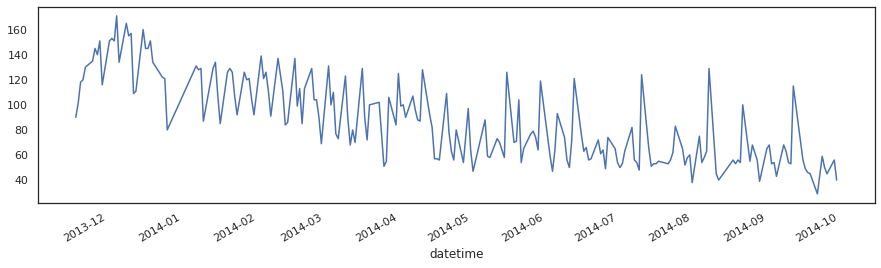

In [392]:
train["y"].plot(figsize=(15, 4))

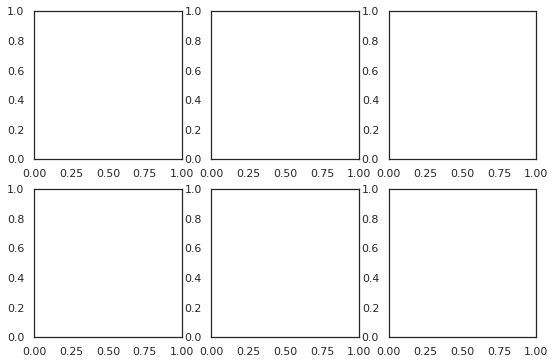

In [393]:
fig, ax = plt.subplots(2, 3, figsize=(9,6))

In [394]:
# fig

In [395]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0131701d90>,
      dtype=object)

In [396]:
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [397]:
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [398]:
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


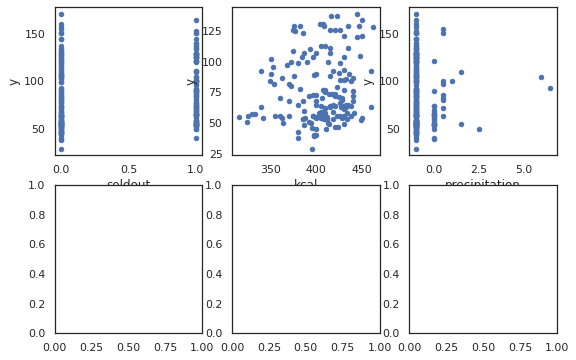

In [399]:
fig

In [400]:
train.plot.scatter(x="payday", y="y", ax=ax[1][0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [401]:
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [402]:
train.plot.scatter(x="month", y="y", ax=ax[1][2])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [403]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

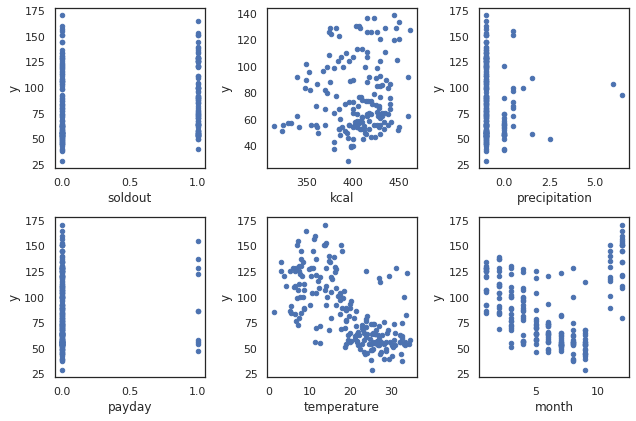

In [404]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()

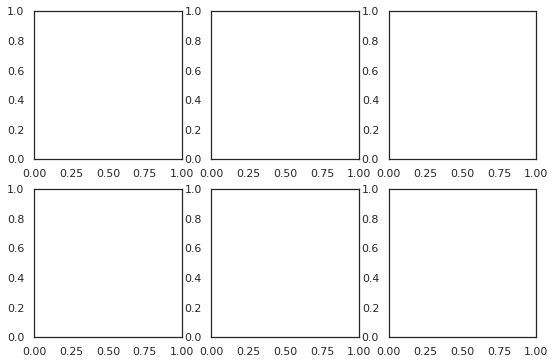

In [405]:
fig, ax = plt.subplots(2,3,figsize=(9,6))

In [406]:
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


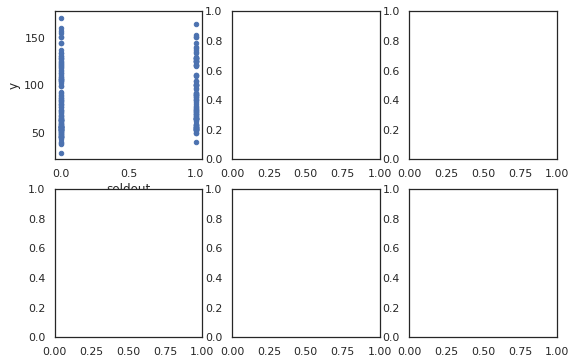

In [407]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])

In [408]:
# fig

In [409]:
#plt.tight_layout()

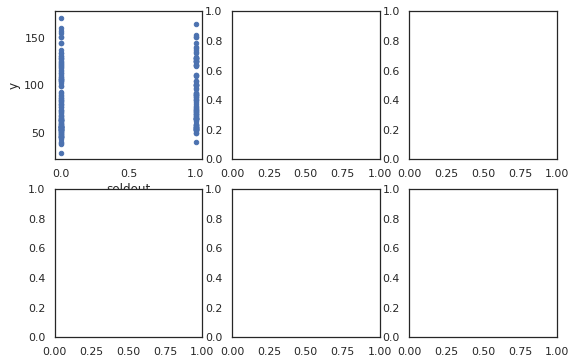

In [410]:
fig

In [411]:
# plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

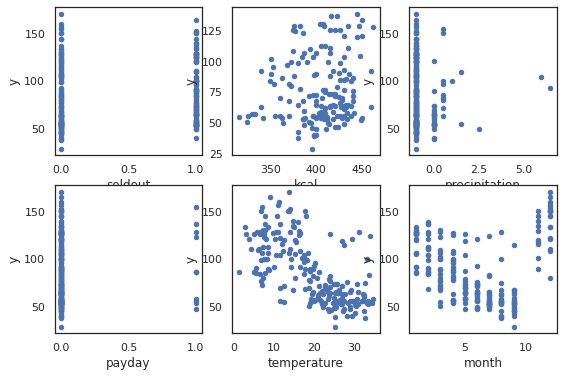

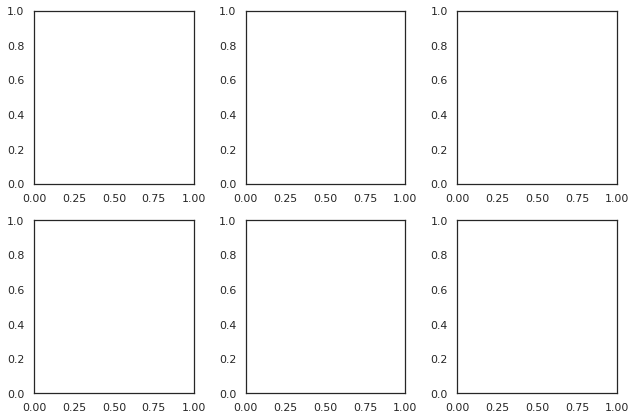

In [412]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
fig, ax = plt.subplots(2,3,figsize=(9,6))
plt.tight_layout()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

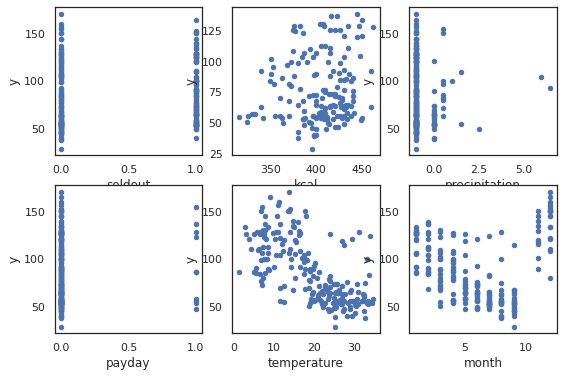

In [413]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])

In [414]:
# Jupyter Notebook 上で Matplotlib はどう動いているのか？
# https://qiita.com/U25CE/items/c2714bf5903de84bf47b

In [415]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

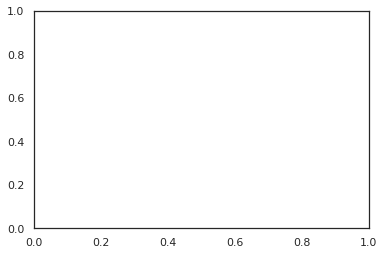

In [416]:
plt.gca()

In [417]:
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

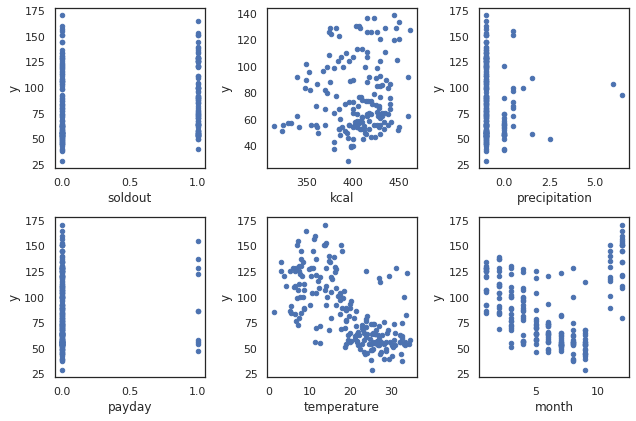

In [418]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

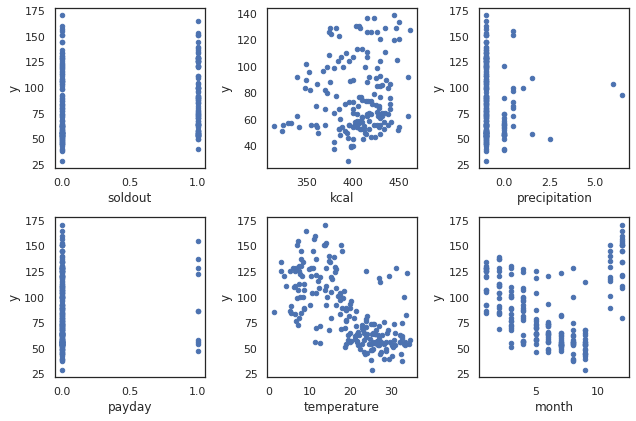

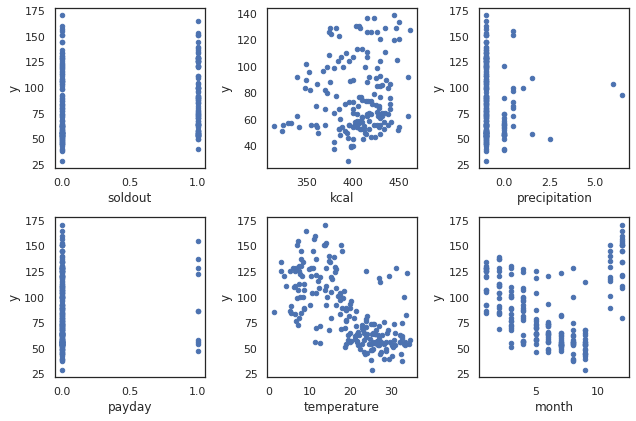

In [419]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()
plt.gcf()

In [420]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [421]:
plt.show()

In [422]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [423]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [424]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

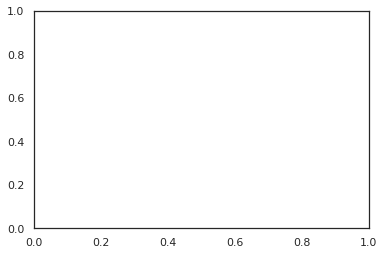

In [425]:
plt.gca()

In [426]:
plt.close()

In [427]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

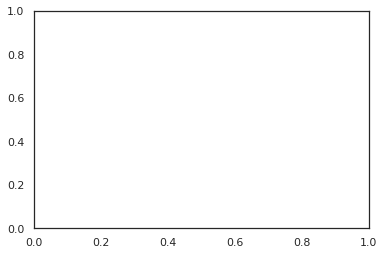

In [428]:
plt.gca()

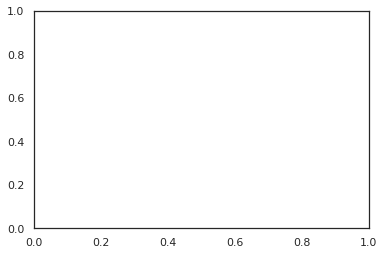

In [429]:
plt.cla()

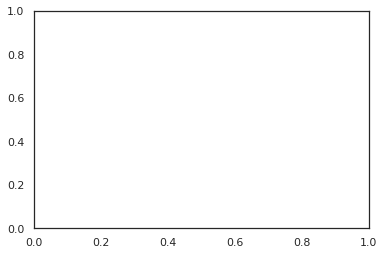

In [430]:
plt.gca()

In [431]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [432]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [433]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [434]:
# Matplotlib plt.subplots()の使い方｜FigureとAxesを同時生成！
# https://www.yutaka-note.com/entry/matplotlib_subplots

In [435]:
# matplotlibのめっちゃまとめ
# https://qiita.com/nkay/items/d1eb91e33b9d6469ef51

In [436]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()
plt.gcf()
plt.close()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

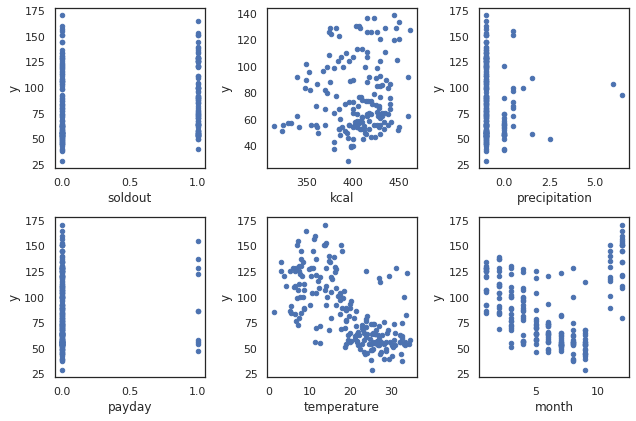

In [437]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()
plt.gcf()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

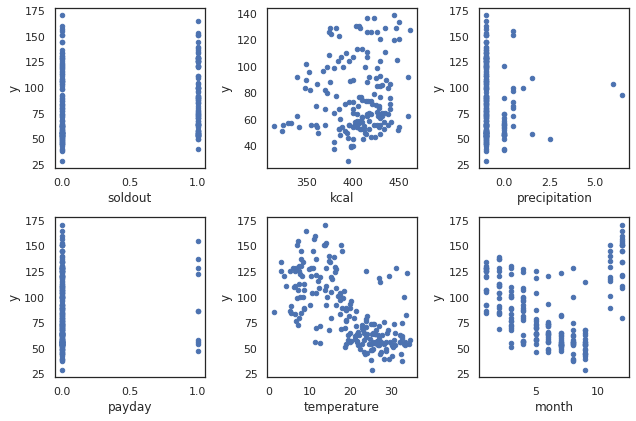

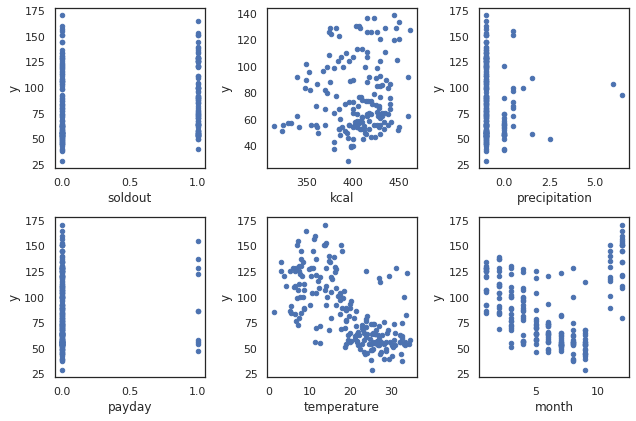

In [438]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()
plt.gcf()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

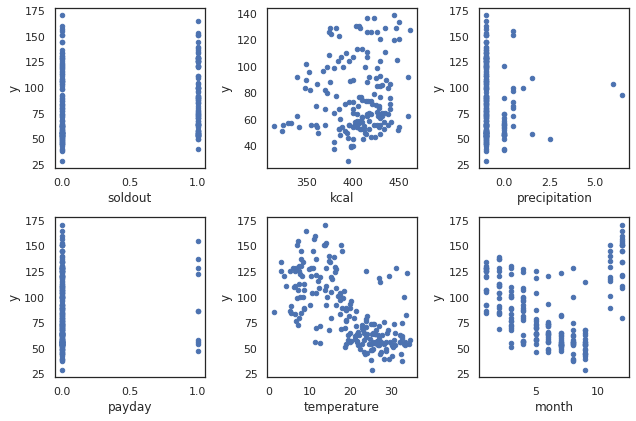

In [439]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

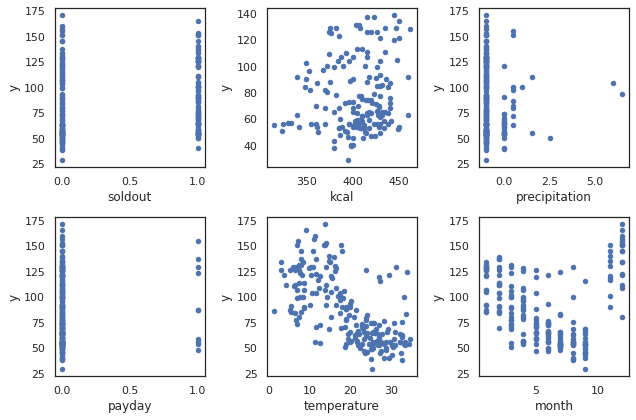

In [440]:
fig, ax = plt.subplots(2,3,figsize=(9,6), tight_layout=True)
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])

train.plot.scatter(x="month", y="y", ax=ax[1][2])

In [441]:
# Google Colabでまたまた日本語表示が豆腐不可避な方に（2019/10/27時点）
# https://qiita.com/siraasagi/items/d72f60c25b30269d89e4

# 日本語フォントをダウンロードする。
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [442]:
# キャッシュを削除する。
# !rm /root/.cache/matplotlib/fontList.json　# 旧cache
!rm /root/.cache/matplotlib/fontlist-v310.json # 消すべきcache

# ランタイムを再起動する。(2020/10/14 この手順は不要ですので、スキップしてください)

rm: cannot remove '/root/.cache/matplotlib/fontlist-v310.json': No such file or directory


In [443]:
import matplotlib
matplotlib.get_cachedir()

'/root/.cache/matplotlib'

In [444]:
ls /root/.cache/matplotlib

tex.cache/


In [445]:
ls /root/.cache/matplotlib/tex.cache

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="IPAGothic") # , style="white"

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24555 missing from current font.
  font.set_

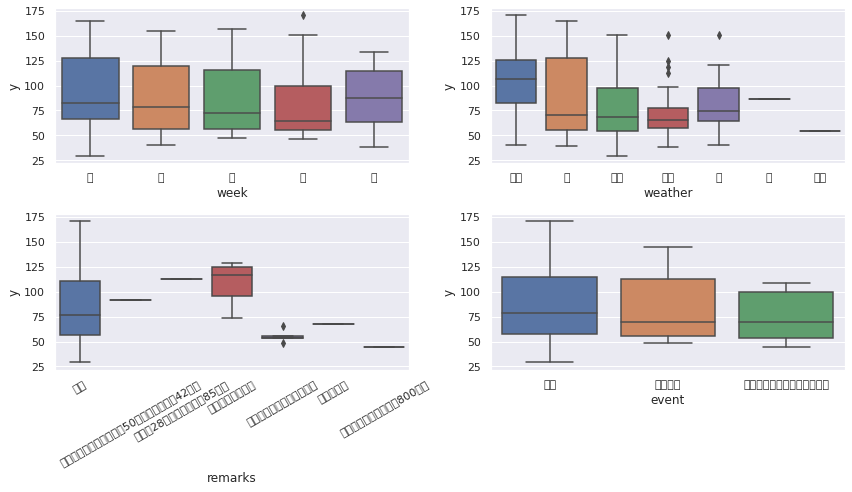

In [447]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7), tight_layout=True)
sns.boxplot(x="week", y="y", data=train, ax=ax[0][0])
sns.boxplot(x="weather", y="y", data=train, ax=ax[0][1])
sns.boxplot(x="remarks", y="y", data=train, ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=30)
sns.boxplot(x="event", y="y", data=train, ax=ax[1][1])

In [448]:
# Matplotlibで簡単に日本語を表示する方法（Windows）
# https://gammasoft.jp/blog/matplotlib-japanese-fonts/
# -> As a result, I didn't use this knowledge above but the one below.

In [449]:
# Google Colabでまたまた日本語表示が豆腐不可避な方に（2019/10/27時点）
# https://qiita.com/siraasagi/items/d72f60c25b30269d89e4

In [450]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

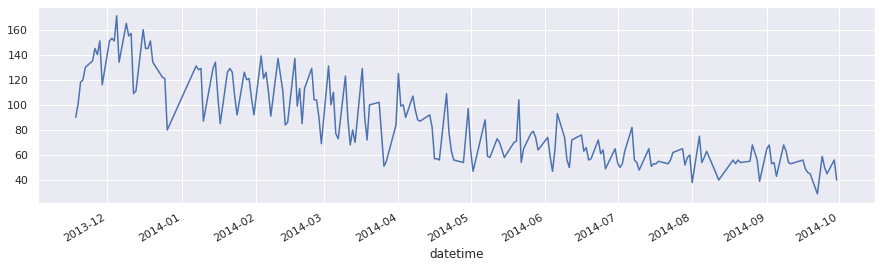

In [451]:
train[train["remarks"]!="お楽しみメニュー"]["y"].plot(figsize=(15,4))

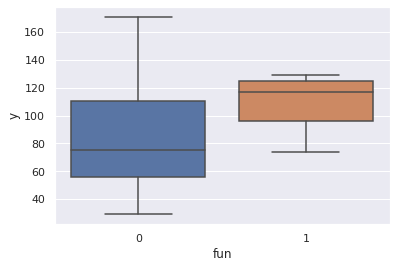

In [452]:
train["fun"] = train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
sns.boxplot(x="fun", y="y", data=train)

In [453]:
from scipy.stats import median_test

In [454]:
# median_test

In [455]:
stat,p,med,tbl = median_test(train[train["fun"]==1]["y"], train[train["fun"]==0]["y"])

In [456]:
print("p", p, "stat", stat)

p 0.007057960766247775 stat 7.2581589841730345


In [457]:
# type(train)

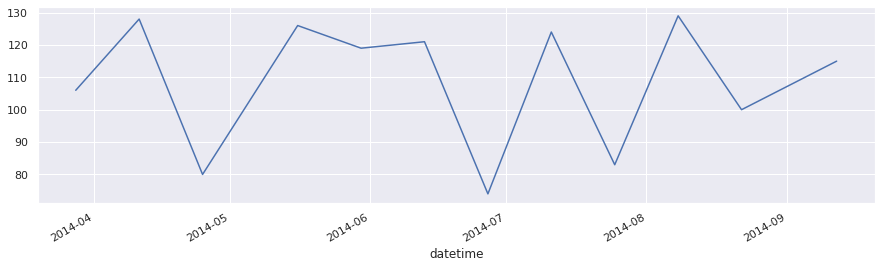

In [458]:
train[train["remarks"]=="お楽しみメニュー"]["y"].plot(figsize=(15,4))

In [459]:
# train[train["remarks"]=="お楽しみメニュー"]["y"]

In [460]:
# type(train[train["remarks"]=="お楽しみメニュー"]["y"])

In [461]:
# train[train["remarks"]=="お楽しみメニュー"]

In [462]:
# type(train[train["remarks"]=="お楽しみメニュー"])

In [463]:
# type(train[train["remarks"]=="お楽しみメニュー"])

In [464]:
# type(train)

In [465]:
train["curry"] = train["name"].apply(lambda x: 1 if x.find("カレー")>0 else 0)

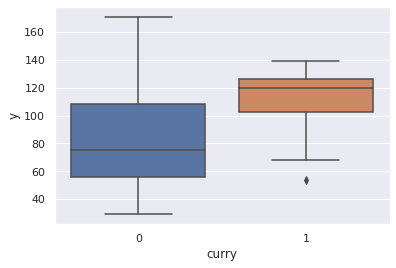

In [466]:
sns.boxplot(x="curry", y="y", data=train)

In [467]:
# train

In [468]:
# type(train["name"].apply)

method

In [469]:
# type(train["name"])

pandas.core.series.Series

In [470]:
# type(train["name"][0])

str

In [471]:
# type(train["name"][0].find)

builtin_function_or_method

In [472]:
# help(train["name"][0].find)

Help on built-in function find:

find(...) method of builtins.str instance
    S.find(sub[, start[, end]]) -> int
    
    Return the lowest index in S where substring sub is found,
    such that sub is contained within S[start:end].  Optional
    arguments start and end are interpreted as in slice notation.
    
    Return -1 on failure.



In [ ]:
# help(train["name"].apply)

In [474]:
stat, p, md, tbl = median_test(train[train["curry"]==1]["y"], train[train["curry"]==0]["y"])

In [475]:
# md

In [476]:
# tbl

In [477]:
print("p: ", p, "stat", stat)

p:  0.018152625492681023 stat 5.581359548021204


In [478]:
# 値が合わない

In [479]:
train = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/train.csv")

In [480]:
test = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/test.csv")

In [481]:
sample = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/sample.csv", header=None)

In [482]:
# train.info()

In [483]:
# type(train.info)

In [484]:
# help(train.info)

In [485]:
# test.info()

In [486]:
# sample.info()

In [487]:
# sample

In [488]:
sample_with_header = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/sample.csv")

In [489]:
# sample_with_header

In [490]:
train["t"] = 1

In [491]:
test["t"] = 0

In [492]:
type(test["t"])

pandas.core.series.Series

In [493]:
dat = pd.concat([train, test], sort=True)

In [494]:
# pd.set_option('display.max_rows', 10)

In [495]:
# dat

In [496]:
dat = dat.reset_index(drop=True)
# dat

In [497]:
dat["days"] = dat.index

In [498]:
pd.set_option('display.max_rows', 10)

In [499]:
# dat["days"]

In [500]:
# dat

In [501]:
dat["precipitation"] = dat["precipitation"].apply(lambda x: -1 if x=="--" else x).astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [502]:
dat["fun"] = dat["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
dat["curry"] = dat["name"].apply(lambda x: 1 if x.find("カレー")>=0 else 0)

In [503]:
# dat

In [504]:
cols = ["precipitation", "weather", "days", "fun", "curry", "y"]

In [505]:
# cols

In [506]:
from sklearn.model_selection import KFold

In [507]:
# KFold

In [508]:
from sklearn.metrics import mean_squared_error as MSE

In [509]:
# MSE

In [510]:
from sklearn.linear_model import LinearRegression as LR

In [511]:
# LR

In [512]:
from sklearn.ensemble import RandomForestRegressor as RF

In [513]:
# RF

In [514]:
def learning(train_X, y_train):
    model1 = LR()
    model2 = RF(n_estimators=100, )

SyntaxError: ignored